In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_data = pd.read_csv("train.csv")
train_data.head()

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
import matplotlib.pyplot
import csv

train_csv = open("train.csv", "r", encoding="utf-8", errors="", newline="" )
f = csv.reader(train_csv, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
for row in f:

    pclass = row[2]
    age = row[5]
    if row[1] == '1':
#   green is survived
        matplotlib.pyplot.scatter( pclass, age, c='g' )
    else:
        matplotlib.pyplot.scatter( pclass, age, c='r' )

matplotlib.pyplot.savefig('age-pclass.png')
matplotlib.pyplot.show()

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


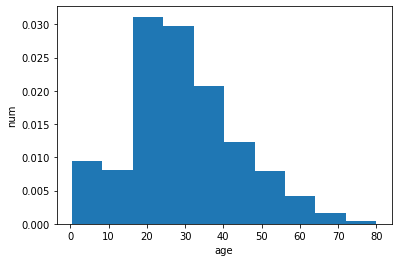

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_data = pd.read_csv("train.csv")
import matplotlib.pyplot as plt
# print(train_data["Age"])
plt.hist(train_data["Age"],normed=True)
plt.xlabel("age")
plt.ylabel("num")
# matplotlib.pyplot.savefig('age-hist.png')
plt.show()

In [ ]:
import matplotlib.pyplot
import csv

train_csv = open("train.csv", "r", encoding="utf-8", errors="", newline="" )
f = csv.reader(train_csv, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
for row in f:
    Sibsp = row[6]
    parch = row[7]
    if row[1] == '1':
        matplotlib.pyplot.scatter( Sibsp, parch, c='g' )
    else:
        matplotlib.pyplot.scatter( Sibsp, parch, c='r' )

matplotlib.pyplot.savefig('sibsp-parch.png')
matplotlib.pyplot.show()

In [ ]:
import matplotlib.pyplot
import csv

train_csv = open("train.csv", "r", encoding="utf-8", errors="", newline="" )
f = csv.reader(train_csv, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

fig, ax = plt.subplots(facecolor="w")

for row in f:
    Fare = row[9]
    Embarked = row[11]
    if row[1] == '1':
        ax.scatter( Fare, Embarked, c='g' , vmin=0.0, vmax=1.0)
    else:
        ax.scatter( Fare, Embarked, c='r' , vmin=0.0, vmax=1.0)

ax.set_xticks([0,100,200])
# matplotlib.pyplot.savefig('Fare-Embarked.png')
matplotlib.pyplot.show()

In [ ]:
import matplotlib.pyplot
import csv

train_csv = open("train.csv", "r", encoding="utf-8", errors="", newline="" )
f = csv.reader(train_csv, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
for row in f:
    Sex = row[4]
    Age = row[5]
    if row[1] == '1':
        matplotlib.pyplot.scatter( Sex, Age, c='g' )
    else:
        matplotlib.pyplot.scatter( Sex, Age, c='r' )

matplotlib.pyplot.savefig('Sex-Age.png')
matplotlib.pyplot.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv("train.csv")
train_data = train_data.fillna(train_data.median())
y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
x = pd.get_dummies(train_data[features])
# x_test = pd.get_dummies(test_data[features])
# print(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(x)
x = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

pca = PCA(svd_solver='randomized',n_components=4, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# clf = SVC()
# clf = clf.fit(X_train_pca, y_train)
# pred = clf.predict(X_test_pca)
# print("test accuracy", accuracy_score(y_test, pred), "\n")

warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

kfold_cv = KFold(n_splits=5, shuffle=True)

for(name, algorithm) in allAlgorithms:
    try:
        clf = algorithm()
        if hasattr(clf, "score"):
            scores = cross_val_score(clf, x, y, cv=kfold_cv)
            print(name, ", ", scores)
    except :
        continue

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

train_data = pd.read_csv("train.csv")
train_data = train_data.fillna(train_data.median())
y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
x = pd.get_dummies(train_data[features])
# x_test = pd.get_dummies(test_data[features])
# print(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(x)
x = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

pca = PCA(svd_solver='randomized',n_components=4, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

parameters = [
    {"C": [0.1, 1, 10, 100, 1000, 10000], "kernel":["linear"]},
    {"C": [0.1, 1, 10, 100, 1000, 10000], "kernel":["rbf"], "gamma":[0.001, 0.0001]},
    {"C": [0.1, 1, 10, 100, 1000, 10000], "kernel":["sigmoid"], "gamma": [0.001, 0.0001]}
]
kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV( SVC(), parameters, cv=kfold_cv)
clf.fit(X_train_pca, y_train)
print("best: ", clf.best_estimator_)
pred = clf.predict(X_test_pca)
print("accracy: ", accuracy_score(y_test, pred))

# clf = SVC()
# clf = clf.fit(X_train_pca, y_train)
# pred = clf.predict(X_test_pca)
# print("test accuracy", accuracy_score(y_test, pred), "\n")

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv("train.csv")
train_data = train_data.fillna(train_data.median())
y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
x = pd.get_dummies(train_data[features])
# x_test = pd.get_dummies(test_data[features])
# print(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(x)
x = scaler.transform(x)

for i in range(1,len(features)):
    print("n_components: ", i)
    accuracys = []
    for j in range(0,30):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

        pca = PCA(svd_solver='randomized',n_components=i, whiten=True).fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf = SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
        clf = clf.fit(X_train_pca, y_train)
        pred = clf.predict(X_test_pca)
#         print("test accuracy", accuracy_score(y_test, pred), "\n")
        accuracys.append(accuracy_score(y_test, pred))
    print("test accuracy", sum(accuracys) / float(len(accuracys)))

n_components:  1
test accuracy 0.7849162011173184
n_components:  2
test accuracy 0.7936685288640594
n_components:  3
test accuracy 0.7843575418994414


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_data = pd.read_csv("train.csv")
train_data = train_data.fillna(train_data.median())
test_data = pd.read_csv("test.csv")
test_data = test_data.fillna(test_data.median())
y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
x = pd.get_dummies(train_data[features])
x_test = pd.get_dummies(test_data[features])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(x)
x = scaler.transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

pca = PCA(svd_solver='randomized',n_components=3, whiten=True).fit(x)
X_train = pca.transform(x)
X_test = pca.transform(x_test)

clf = SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
            decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, probability=False, random_state=None, shrinking=True,
            tol=0.001, verbose=False)
clf = clf.fit(X_train, y)
pred = clf.predict(X_test)
# print("test accuracy", accuracy_score(y_test, pred), "\n")
# print(pred)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred})
output.to_csv('my_submission1.csv', index=False)
print("Your submission was successfully saved!")